In [5]:
import os
if os.path.basename(os.getcwd())=='experiments':
    os.chdir("./..")

In [1]:
import pandas as pd

In [4]:
from model.hierarchical_model_return_status import *
from utils.data_preparation import *
from utils.evaluation import *
import sklearn.metrics

In [9]:
df = get_processed_renttherunway_data()
train = get_train_runttherunway_data()
test = get_test_runttherunway_data()
full_category_counts = df.value_counts("category").values
train_category_counts = train.value_counts("category").values

In [10]:
def compute_mean_target_probability(results):
    return results.apply(lambda row: row[row['result']], axis=1).mean()

def compute_mean_log_probability(results):
    #return np.log(results.apply(lambda row: row[row['result']], axis=1)).mean()
    return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()

def get_stats(hs, results):
    stats = {"w": hs.w, "N_of_kept_categories": (hs.kept_categories!=hs.OTHER_CAT).sum()}
    stats["Mean_target_prob"] = compute_mean_target_probability(results)
    stats["Mean_target_logprob"] = compute_mean_log_probability(results)
    stats["treshold"] = hs.treshold
    stats["sklearn_stats"] = sklearn.metrics.classification_report(results["result"], results["predicted_return_status"], output_dict=True)
    return stats

In [ ]:
checked_tresholds = [10000, 4000, 2000, 1000, 500, 200, 100, 50, 20, 10]
checked_w = np.arange(0, 1, 0.01)
all_results = []
for treshold in checked_tresholds:
    hs = HierarchicalStatus(category_treshold=treshold)
    hs.train_model(train, T=0)
    for w in checked_w:
        hs.w = w
        results = hs.predict(test)
        all_results.append(get_stats(hs, results))


In [5]:
all_results_df = pd.DataFrame(all_results)
all_results_df.to_csv("results/w_sampling_results_to_1.csv", index=False)
all_results_df = pd.read_csv("results/w_sampling_results_to_1.csv")

<AxesSubplot:xlabel='w', ylabel='Mean_target_prob'>

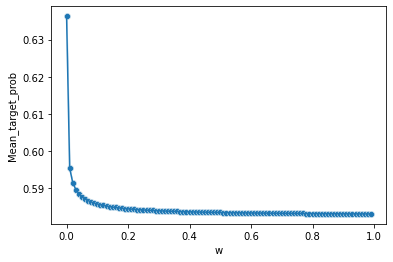

In [7]:
sns.lineplot(data = all_results_df, x = "w", y= "Mean_target_prob")

In [11]:
checked_tresholds = [10000, 2000, 500, 100, 20]
checked_w = np.arange(0, 0.1, 0.001)
all_results = []
for treshold in checked_tresholds:
    hs = HierarchicalStatus(category_treshold=treshold)
    hs.train_model(train, T=0)
    for w in checked_w:
        hs.w = w
        results = hs.predict(test)
        all_results.append(get_stats(hs, results))

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

In [12]:
all_results_df = pd.DataFrame(all_results)
all_results_df.to_csv("results/w_sampling_results_to_0.1.csv", index=False)
all_results_df = pd.read_csv("results/w_sampling_results_to_0.1.csv")

<AxesSubplot:xlabel='w', ylabel='Mean_target_prob'>

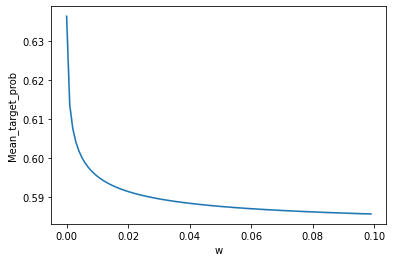

In [13]:
sns.lineplot(data = all_results_df, x = "w", y= "Mean_target_prob")

In [14]:
checked_tresholds = [10000, 2000, 500, 100, 20]
checked_w = np.arange(0, 0.01, 0.0001)
all_results = []
for treshold in checked_tresholds:
    hs = HierarchicalStatus(category_treshold=treshold)
    hs.train_model(train, T=0)
    for w in checked_w:
        hs.w = w
        results = hs.predict(test)
        all_results.append(get_stats(hs, results))

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

Initializing model... Model initiated
Trainset prepared


<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning: divide by zero encountered in log
  return results.apply(lambda row: np.log(row[row['result']]), axis=1).replace({-np.inf: np.nan}).mean()
<ipython-input-10-e250943aa15d>:6: RuntimeWarning:

In [15]:
all_results_df = pd.DataFrame(all_results)
all_results_df.to_csv("results/w_sampling_results_to_0.01.csv", index=False)
all_results_df = pd.read_csv("results/w_sampling_results_to_0.01.csv")

<AxesSubplot:xlabel='w', ylabel='Mean_target_prob'>

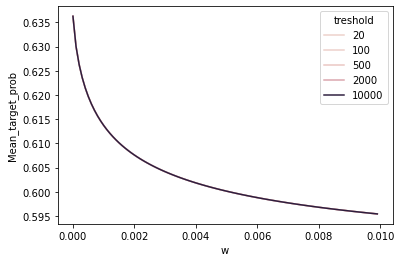

In [18]:
sns.lineplot(data = all_results_df, x = "w", y= "Mean_target_prob", hue="treshold")